In [1]:
from Bio import Phylo
from matplotlib import pyplot as plt
import matplotlib as mpl

In [11]:
####### parameters #######
mpl.rcParams['font.family']       = 'sans-serif'
mpl.rcParams['font.sans-serif']   = ["Helvetica","Arial","DejaVu Sans","Lucida Grande","Verdana"]
mpl.rcParams['figure.figsize']    = [4,3]
mpl.rcParams['font.size']         = 10
mpl.rcParams["axes.labelcolor"]   = "#000000"
mpl.rcParams["axes.linewidth"]    = 1.0 
mpl.rcParams["xtick.major.width"] = 1.0
mpl.rcParams["ytick.major.width"] = 1.0
cmap1 = plt.cm.tab10
cmap2 = plt.cm.Set3  
colors1 = [cmap1(i) for i in range(0,10)]
colors2 = [cmap2(i) for i in range(0,12)] 
##########################

In [22]:
def get_BBIs(treefile):
    
    tree=Phylo.read(treefile, 'newick')

    BBIs=[]
    for node in tree.get_nonterminals():
        downstream_tips = node.get_terminals()
        if(len(downstream_tips)>10 and len(node.clades)==2):
            M = len(node.clades[0].get_terminals())
            N = len(node.clades[1].get_terminals())
            BBIs.append(min(M,N) / max(M,N))
    
    return BBIs

In [23]:
BBIs = get_BBIs("/Users/nk/Dropbox (Yachie Lab)/NAOKI_KONNO.LAB/Experiment/Projects/FRACTAL/code/nkPRESUME/test/PRESUMEout/PRESUMEout.nwk")

In [24]:
len(BBIs)

1727

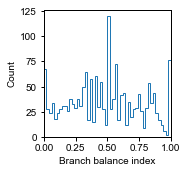

In [25]:
fig = plt.figure(figsize=(2.2,2.2))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(BBIs, bins=50, histtype="step",lw=1,range=(0,1))
ax.set_xlim(0,1.0)
ax.set_xlabel('Branch balance index',fontsize=10)
ax.set_ylabel('Count',fontsize=10)
plt.show()
plt.close()